# Machine-Learning-and-Statistics-Assessment-2019

###  What is Boston DataSet ? 
A Dataset derived from information collected by the U.S. Census Service concerning housing in the area of Boston Mass. This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass.

### What information was collected for the Boston DataSet ?
The Boston Housing Dataset consists of price of houses in various places in Boston. Alongside with price, the dataset also provide information such as Crime (CRIM), areas of non-retail business in the town (INDUS), the age of people who own the house (AGE), and there are many other attributes that available here.

In [4]:
#import libraries
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib as plt
# Import libraries

# from sklearn.datasets import load_boston


# Using statsmodels.
# import statsmodels.api as sm


In [6]:
# data = load_boston()

# df = pd.DataFrame(data=data['data'], columns = data['feature_names'])
# df.head()

In [7]:
# df.describe()

In [2]:
# First, we will import the required libraries.
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [8]:
# Next, we will load the housing data from the scikit-learn library and understand it.
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [9]:
# We print the value of the boston_dataset to understand what it contains. 
print(boston_dataset.keys())


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [ ]:
# data: contains the information for various houses
# target: prices of the house
# feature_names: names of the features
# DESCR: describes the dataset
# To know more about the features use boston_dataset.DESCR The description of all the features is given below:

#### CRIM: Per capita crime rate by town
#### ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
#### INDUS: Proportion of non-retail business acres per town
#### CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#### NOX: Nitric oxide concentration (parts per 10 million)
#### RM: Average number of rooms per dwelling
#### AGE: Proportion of owner-occupied units built prior to 1940
#### DIS: Weighted distances to five Boston employment centers
#### RAD: Index of accessibility to radial highways
#### TAX: Full-value property tax rate per 10,000
#### PRATIO: Pupil-teacher ratio by town
#### B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
#### LSTAT: Percentage of lower status of the population
#### MEDV: Median value of owner-occupied homes in 1000s

### The prices of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables based on which we will predict the value of a house.

### We will now load the data into a pandas dataframe using pd.DataFrame. We then print the first 5 rows of the data using head()

In [17]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### We can see that the target value MEDV is missing from the data. We create a new column of target values and add it to the dataframe

In [18]:
boston['MEDV'] = boston_dataset.target

### Data preprocessing

After loading the data, it’s a good practice to see if there are any missing values in the data. We count the number of missing values for each feature using isnull()

In [20]:
boston.isnull().sum()
# However, there are no missing values in this dataset as shown below.

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Exploratory Data Analysis

Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.

### Let’s first plot the distribution of the target variable MEDV. We will use the distplot function from the seaborn library.

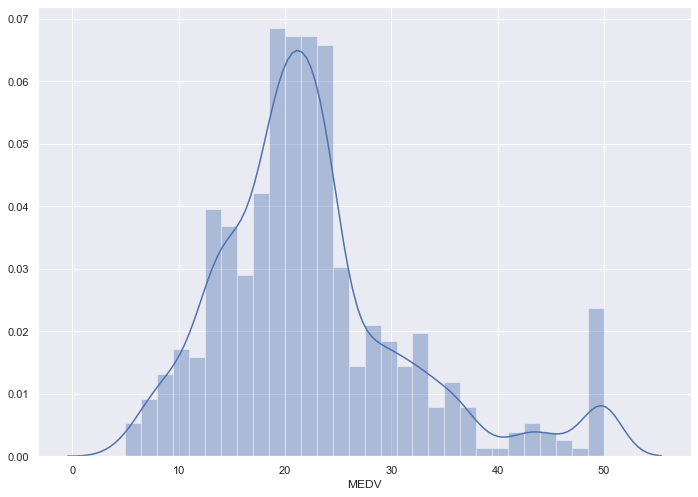

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

# We see that the values of MEDV are distributed normally with few outliers.

### Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.

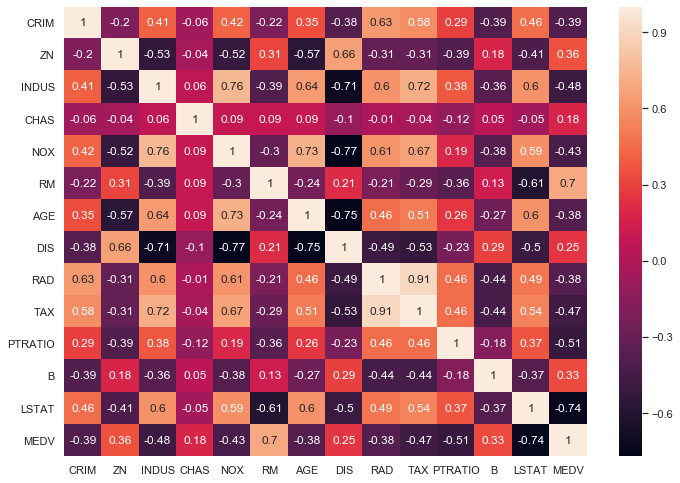

In [23]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

### The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

### Observations:

    To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).
    
    An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.

### Based on the above observations we will RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV.

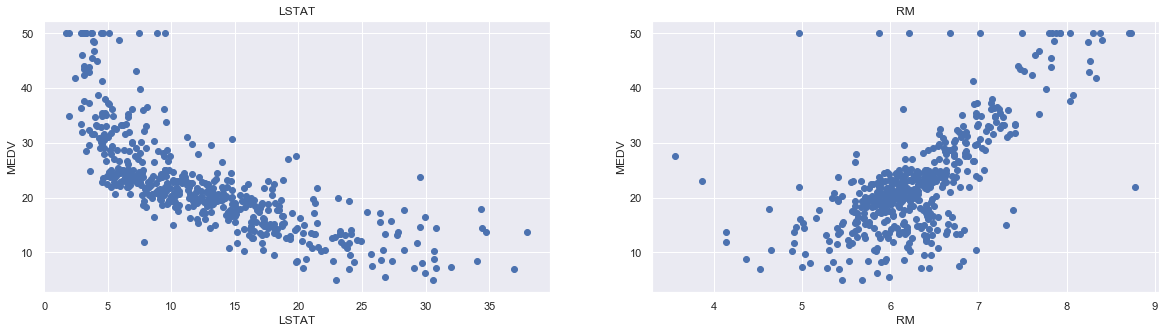

In [24]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

### Observations:

    The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
    
    The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

### Preparing the data for training the model

We concatenate the LSTAT and RM columns using np.c_ provided by the numpy library.

In [25]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

### Splitting the data into training and testing sets

Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. To split the data we use train_test_split function provided by scikit-learn library. We finally print the sizes of our training and test set to verify if the splitting has occurred properly.

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


### Training and testing the model

We use scikit-learn’s LinearRegression to train our model on both the training and test sets.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model evaluation

We will evaluate our model using RMSE and R2-score.

In [33]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

NameError: name 'r2_score' is not defined

## References
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155